# Анализ влияния TikTok на популярность музыки 🎵
## Исследование данных с помощью Spotify API

### 🎯 Цель исследования

Я хочу изучить, как TikTok влияет на популярность песен.  
Для этого возьмём список вирусных треков из TikTok и посмотрим, как они ведут себя в чартах Spotify.  

**Задачи:**

1. Узнать, сколько песен из Global-50 популярны в TikTok, сравнив плейлист [Global 50](https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF) и плейлист [TikTok Music 2025💯Viral Trending TikTok Songs](https://open.spotify.com/playlist/57EG9lWmdn7HHofXuQVsow).

2. Проанализировать долговечность песен из TikTok на основе их попадания в плейлисты нескольких годов.

3. Узнать, сколько песен, завирусившихся в TikTok, также входят в топ-10000 песен нашего времени. Анализ влияния ТикТок на формирование музыкальной культуры.
    
   3.1. Выявить самого влиятельного TikTok-артиста нашего времени.



In [1]:
!pip install requests pandas spotipy

In [2]:
# Импортируем необходимые библиотеки
import requests
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Указываем свои Client ID, Client Secret и Redirect URI
client_id = ''
client_secret = ''
redirect_uri = ''


In [3]:
# Создаем объект для авторизации через OAuth
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=["user-library-read", "playlist-read-private"]))

# Ссылка для авторизации будет автоматически сгенерирована, нужно перейти по ней
print("Перейдите по следующей ссылке для авторизации: ", sp.auth_manager.get_authorize_url())


Перейдите по следующей ссылке для авторизации:  https://accounts.spotify.com/authorize?client_id=8aef9166019b49a7b3b6b6ebebe99fce&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback%2F&scope=playlist-read-private+user-library-read


### Получение токена

In [29]:
auth_code = ''

# Получаем токен, отправив запрос на Spotify
token_url = 'https://accounts.spotify.com/api/token'
data = {
    'grant_type': 'authorization_code',
    'code': auth_code,
    'redirect_uri': redirect_uri,
}
auth = (client_id, client_secret)
response = requests.post(token_url, data=data, auth=auth)

# Получаем JSON-ответ с токеном
tokens = response.json()
print(tokens)

{'access_token': 'BQAQuYueiHCAx3E5NtuZZGpNVrQYDFcNXpWRuv_rtFOTP5yI8LK8X2WeSy78knAyX-DnpSF2-Q49Y9XOv40QQnfKHoqnMkyvCEY_HWlHeqrKUyUi8j-Dfk-TbpJlHMnDJrHO_5bjRCD6lGjcoy8TmuXqJKNLT9hE1RJZarumbga7y_Y0wRt8KD9BMwhSWch9Z9Q-aQVHxA4SHwigquaDdr34_g_bx92fIXOuPDGvIZ_UY41eWoEGwIHRKA', 'token_type': 'Bearer', 'expires_in': 3600, 'refresh_token': 'AQDG40IMOq0vFzgKHS7raHlNa8T9L-z5kTujY678LgpjsY5xtVvse2AlHZ0Q_O_2L0zdWE4IoyjmQRbI7oiGSDWukeV23zpew5EN98UeXmABsuGlQmDLxx983rnVoGSjwZY', 'scope': 'playlist-read-private user-library-read'}


### Использование полученного токена для доступа к Spotify API

In [30]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Вставляем полученный access_token
access_token = ''

# Авторизация с токеном
sp = spotipy.Spotify(auth=access_token)

# Пример запроса: получаем информацию о текущем пользователе
user_info = sp.current_user()
print(user_info)


{'display_name': 'п☠ля', 'external_urls': {'spotify': 'https://open.spotify.com/user/5ga336w19xouuxz4bsc15ij36'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/users/5ga336w19xouuxz4bsc15ij36', 'id': '5ga336w19xouuxz4bsc15ij36', 'images': [], 'type': 'user', 'uri': 'spotify:user:5ga336w19xouuxz4bsc15ij36'}


### **Задача 1:** Узнать, сколько песен из Global-50 популярны в Тиктоке, сравнив плейлист Global 50 и плейлист TikTok Music 2025💯Viral Trending TikTok Songs.



In [28]:
import requests
import pandas as pd

# Токен доступа
access_token = 'BQAXzPVFpeVMBf3XnwhIyAW5Ix_-HNd00ky8FID_Wo2luU83vVm7HZ75kX6n0MX0TKr7UFKh-JOktqWg0NSZqypxY93uu6SrpiYfr_RZQDbHAhx8nYIHrMuJ9ELmD4T4v0zSUQksW1838icb9jMvNxA_xyYBOs-bLgogQ4PPvspBHcF8mfkrP84OFkjrchGnwrcihRDbkqyBxkv_H9EV610N0BQRZhwQSMiREUdA6yOCKc-JWAUlCJ8aNw'


# Функция для получения треков из плейлиста
def get_tracks_from_playlist(playlist_id):
    url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        tracks = []
        for item in data['items']:
            track = item['track']
            track_id = track['id']
            track_name = track['name']
            artists = ', '.join([artist['name'] for artist in track['artists']])
            album_name = track['album']['name']
            release_date = track['album']['release_date']
            popularity = track['popularity']
            
            tracks.append([track_id, track_name, artists, album_name, release_date, popularity])
        
        return pd.DataFrame(tracks, columns=['track_id', 'track_name', 'artists', 'album_name', 'release_date', 'popularity'])
    else:
        print(f'Ошибка: {response.status_code}')
        return None

# ID плейлистов
playlist_id_1 = '51T1yFRNaFZ2ONXRJW15Rr'  # Global 50
# (копия плейлиста, так как для подключения к плейлистам
# Spotify через API нужны специальные права)
playlist_id_2 = '57EG9lWmdn7HHofXuQVsow'  # TikTok Music 2025

# Загружаем данные
print("Загружаем Global 50...")
global_50_df = get_tracks_from_playlist(playlist_id_1)
print("Загружаем TikTok Music 2025...")
tiktok_music_df = get_tracks_from_playlist(playlist_id_2)

# Добавляем столбец для проверки вхождения в оба плейлиста
merged_df = global_50_df.copy()
merged_df['in_both_playlists'] = merged_df.apply(
    lambda row: any(
        (row['track_name'] == t_name and row['artists'] == t_artists)
        for t_name, t_artists in zip(tiktok_music_df['track_name'], tiktok_music_df['artists'])
    ),
    axis=1
)

# Сохраняем в CSV
merged_df.to_csv('spotify_tiktok_analysis.csv', index=False)
print("\nДанные сохранены в 'spotify_tiktok_analysis.csv'")
merged_df.head()


Загружаем Global 50...
Ошибка: 401
Загружаем TikTok Music 2025...
Ошибка: 401


AttributeError: 'NoneType' object has no attribute 'copy'

In [10]:
num_common_tracks = merged_df['in_both_playlists'].sum()
filtered_df = merged_df[merged_df['in_both_playlists'] == True]
display(filtered_df)
print(f"Количество треков, присутствующих в обоих плейлистах: {num_common_tracks}")


,track_id,track_name,artists,album_name,release_date,popularity,in_both_playlists
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",MAYHEM,2025-03-07,85,True
2,3LPLRNr58Z9Pn0clnEtkXb,Anxiety,Doechii,Alligator Bites Never Heal (Extended),2025-03-14,80,True
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",rosie,2024-12-06,91,True
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,2024-05-17,98,True
5,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",GNX,2024-11-21,94,True
9,7ne4VBA60CxGM75vw0EYad,That’s So True,Gracie Abrams,The Secret of Us (Deluxe),2024-10-18,96,True
10,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,Not Like Us,2024-05-04,96,True
14,2262bWmqomIaJXwCRHr13j,Sailor Song,Gigi Perez,Sailor Song,2024-07-26,94,True
15,35ISBknsCeZQtq66xABI9g,Messy,Lola Young,This Wasn't Meant For You Anyway,2024-06-21,88,True
19,2LHNTC9QZxsL3nWpt8iaSR,Abracadabra,Lady Gaga,MAYHEM,2025-03-07,84,True


Количество треков, присутствующих в обоих плейлистах: 17


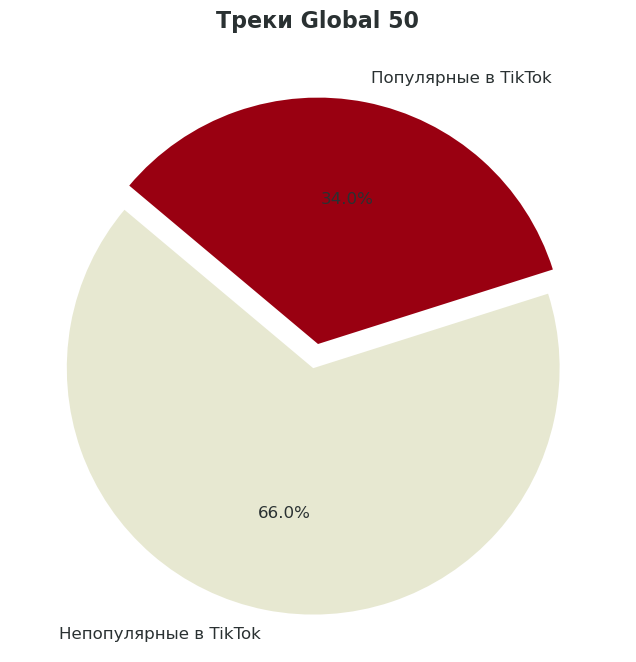

In [11]:
import matplotlib.pyplot as plt

num_only_global_50 = len(global_50_df) - num_common_tracks  # Треки только в Global-50
num_common_tracks = merged_df['in_both_playlists'].sum()  # Треки, присутствующие в обоих плейлистах

labels = ['Непопулярные в TikTok', 'Популярные в TikTok']
sizes = [num_only_global_50, num_common_tracks]
colors = ['#E7E8D1','#990011']  
explode = (0.1, 0)  

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode, 
        textprops={'fontsize': 12, 'color': '#2A3132'})  
plt.title('Треки Global 50', fontsize=16, fontweight='bold', color='#2A3132')  
plt.show()


## Выводы

Вкусы пользователей площадок **TikTok** и **Spotify** пересекаются. Больше трети (17) треков из плейлиста **Global 50** завирусились в TikTok, что позволяет рассматривать TikTok как мощный инструмент для продвижения музыки.

### **Задача 2:** Проанализировать долговечность песен из ТикТок на основе их попадания в плейлисты нескольких годов.

In [24]:
import requests
import pandas as pd

# Токен доступа
access_token = ''

# Функция для получения треков из плейлиста
def get_tracks_from_playlist(playlist_id, year):
    url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        tracks = []
        for item in data['items']:
            track = item['track']
            if track is None:  # Пропускаем пустые треки
                continue
            track_id = track['id']
            track_name = track['name']
            artists = ', '.join([artist['name'] for artist in track['artists']])
            album_name = track['album']['name']
            release_date = track['album']['release_date']
            popularity = track['popularity']
            
            tracks.append([track_id, track_name, artists, album_name, release_date, popularity, year])
        
        return pd.DataFrame(tracks, columns=['track_id', 'track_name', 'artists', 'album_name', 'release_date', 'popularity', 'year'])
    else:
        print(f'Ошибка: {response.status_code}')
        return None

# Плейлисты с разными годами
playlist_ids = {
    2025: "57EG9lWmdn7HHofXuQVsow",
    2024: "4gpWIMj498Vg4ZGDxzkG9Y",
    2023: "7JbZ4oyjCTQh0fk7xTCObX",
    2022: "1ppRW75YAjTahb7A1TFoVi",
    2021: "0VY1hwQiU6YaULVOZCyFnC",
    2020: "4yeF8WVBDCQV2VEQWZxaZJ",
    2019: "1hpCynGYwF9Wo5GM8zvf4u"
}

all_tracks = []

# Загрузка данных из всех плейлистов
for year, playlist_id in playlist_ids.items():
    print(f"Загружаем треки для {year}...")
    tracks_df = get_tracks_from_playlist(playlist_id, year)
    if tracks_df is not None:
        all_tracks.append(tracks_df)
        print(f"Данные для {year} загружены успешно.")

# Объединение всех данных в один DataFrame
final_df = pd.concat(all_tracks, ignore_index=True)

# Сохраняем результат
final_df.to_csv('tiktok_music_analysis_cleaned.csv', index=False)
print("\nОчищенные данные сохранены в 'tiktok_music_analysis_cleaned.csv'")


Загружаем треки для 2025...
Данные для 2025 загружены успешно.
Загружаем треки для 2024...
Данные для 2024 загружены успешно.
Загружаем треки для 2023...
Данные для 2023 загружены успешно.
Загружаем треки для 2022...
Данные для 2022 загружены успешно.
Загружаем треки для 2021...
Данные для 2021 загружены успешно.
Загружаем треки для 2020...
Данные для 2020 загружены успешно.
Загружаем треки для 2019...
Данные для 2019 загружены успешно.

Очищенные данные сохранены в 'tiktok_music_analysis_cleaned.csv'


In [25]:
final_df

,track_id,track_name,artists,album_name,release_date,popularity,year
0,1musbempyJAw5gfSKZHXP9,Anxiety,Doechii,Anxiety,2025-03-05,91,2025
1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",Die With A Smile,2024-08-16,100,2025
2,5vNRhkKd0yEAg8suGBpjeY,APT.,"ROSÉ, Bruno Mars",APT.,2024-10-18,95,2025
3,7ne4VBA60CxGM75vw0EYad,That’s So True,Gracie Abrams,The Secret of Us (Deluxe),2024-10-18,96,2025
4,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,Kendrick Lamar,Not Like Us,2024-05-04,96,2025
...,...,...,...,...,...,...,...
577,2VDadIDCFgDqvVCvaDPtn9,Becky,Championxiii,Champion Status,2019-06-03,39,2019
578,14msK75pk3pA33pzPVNtBF,7 rings,Ariana Grande,7 rings,2019-01-18,1,2019
579,3HVWdVOQ0ZA45FuZGSfvns,I Don't Care (with Justin Bieber),"Ed Sheeran, Justin Bieber",I Don't Care (with Justin Bieber),2019-05-10,75,2019
580,4S8d14HvHb70ImctNgVzQQ,I Love It (& Lil Pump),"Kanye West, Lil Pump",I Love It,2018-09-07,70,2019


In [15]:
# Убираем дубликаты треков в одном и том же плейлисте
final_df = final_df.drop_duplicates(subset=['track_id', 'year'])

# Группируем по треку и собираем список лет, когда он был в плейлистах
track_popularity_over_years = final_df.groupby(['track_id', 'track_name', 'artists'])['year'] \
    .apply(lambda x: sorted(set(x))) \
    .reset_index()

# Добавляем колонку с количеством лет, в которые трек был популярен
track_popularity_over_years['years_active'] = track_popularity_over_years['year'].apply(len)

# Сортируем по количеству лет (чем больше лет, тем долговечнее трек)
longest_lasting_tracks = track_popularity_over_years.sort_values(by='years_active', ascending=False)

# Смотрим топ-10 самых долговечных треков
display(longest_lasting_tracks)

# Сохраняем в CSV
longest_lasting_tracks.to_csv('longest_lasting_tracks.csv', index=False)
print("\nДанные сохранены в 'longest_lasting_tracks.csv'")

,track_id,track_name,artists,year,years_active
176,2K7xn816oNHJZ0aVqdQsha,Softcore,The Neighbourhood,"[2022, 2024]",2
407,5XeFesFbtLpXzIVDNQP22n,I Wanna Be Yours,Arctic Monkeys,"[2022, 2025]",2
320,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,"[2022, 2025]",2
244,3G47RiG2PrvEVo4panDHi9,Be Gone Thot!,LIL MAYO,"[2019, 2020]",2
456,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,"[2019, 2020]",2
...,...,...,...,...,...
186,2VDadIDCFgDqvVCvaDPtn9,Becky,Championxiii,[2019],1
185,2TwWtUP03Keytzaur7mifn,"Galactic Mermaid (From ""Carole & Tuesday"")","Kuraiinu, Lollia",[2019],1
184,2TeLIzFBe3hxkPR5FIQZut,Like I Can,Sam Smith,[2021],1
183,2Sh4sAOfnSHEVKFyysxzat,Can't Remember to Forget You (feat. Rihanna),"Shakira, Rihanna",[2021],1



Данные сохранены в 'longest_lasting_tracks.csv'


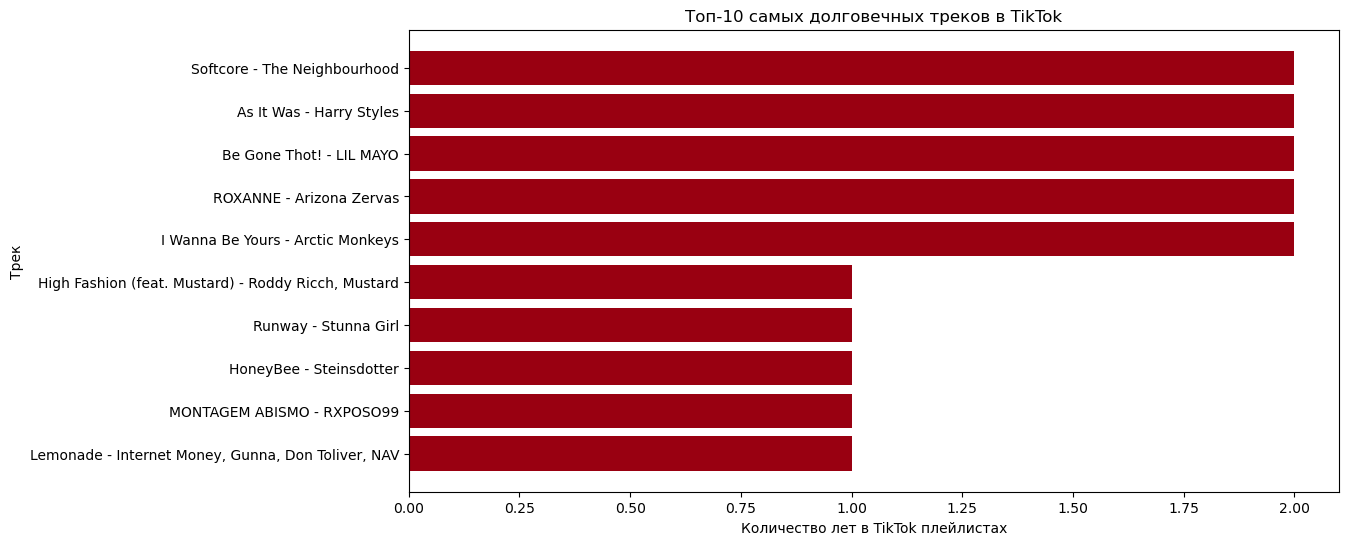

In [16]:
import matplotlib.pyplot as plt

# Выбираем топ-10 самых долговечных треков
top_tracks = longest_lasting_tracks.sort_values(by='years_active', ascending=False).head(10)

# Создаём названия треков в формате "Название - Артист"
top_tracks['track_label'] = top_tracks['track_name'] + " - " + top_tracks['artists']

# Строим график
plt.figure(figsize=(12, 6))
plt.barh(top_tracks['track_label'], top_tracks['years_active'], color='#990011')

# Подписи осей
plt.xlabel('Количество лет в TikTok плейлистах')
plt.ylabel('Трек')
plt.title('Топ-10 самых долговечных треков в TikTok')

# Переворачиваем ось Y, чтобы самые долговечные треки были сверху
plt.gca().invert_yaxis()

# Отображаем график
plt.show()


## Выводы

Результаты показывают, что всего 5 песен стали виральными в 2 разных года. При этом, 2 из таких песен (**Be Gone Thot! - LIL MAYO** и **ROXANNE - Arizona Zervas**) были популярны 2 года подряд, что может быть связано с сезонностью (например, песня стала популярна в декабре 2019 и осталась популярна в январе 2020). Повторить успех годы спустя удалось лишь трём трекам: **Softcore - The Neighbourhood**, **As It Was - Harry Styles**, **I Wanna Be Yours - Arctic Monkeys**. Можно сделать вывод: несмотря на короткий жизненный цикл, песня может стать популярной вновь через несколько лет. Непредсказуемые алгоритмы ТикТока🥲

### **Задача 3:** Узнать, сколько песен, завирусившихся в TikTok, также входят в топ-10000 песен нашего времени. Анализ влияния ТикТок на формирование музыкальной культуры.

### Используемые данные
Для анализа использовался датасет `Spotify_final_dataset.csv`, содержащий информацию о 10 000 самых популярных песнях с 1960 года по настоящее время.  
Источник данных: [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now/data?select=top_10000_1960-now.csv).  

Также был создан дополнительный датасет `viral_songs.csv`, содержащий треки, завирусившиеся в TikTok.  
Для его формирования использованы данные из публичных тематических плейлистов на Spotify, полученные через API.  

В рамках анализа в исходный датасет была добавлена колонка `Viral on TikTok` (Да/Нет), указывающая, вошла ли песня в один из TikTok-плейлистов.  


In [4]:
import requests
import pandas as pd

# Токен доступа
access_token = ''

# Функция для получения треков из плейлиста
def get_tracks_from_playlist(playlist_id):
    url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        tracks = []
        for item in data['items']:
            track = item['track']
            if track is None:  # Пропускаем пустые треки
                continue
            track_name = track['name']
            artists = ', '.join([artist['name'] for artist in track['artists']])
            
            tracks.append([track_name, artists])
        
        return pd.DataFrame(tracks, columns=['track_name', 'artists'])
    else:
        print(f'Ошибка: {response.status_code}')
        return None

# TikTok-плейлисты
playlist_ids = [
    '1H3AmBXPtLgPOwwf1WvUYb',  # Best TikTok Songs 2019-2025
    '57EG9lWmdn7HHofXuQVsow',  # TikTok Music 2025
    '4gpWIMj498Vg4ZGDxzkG9Y',  # tiktok viral songs – 2024
    '7JbZ4oyjCTQh0fk7xTCObX',  # Tiktok dance challenge 2023
    '1ppRW75YAjTahb7A1TFoVi',  # 2022 tik tok nostalgia
    '0VY1hwQiU6YaULVOZCyFnC',  # tiktok 2021
    '5js35CINvAys2SkwpRl8lg',  # 2020-2021 alt tiktok vibes
    '4yeF8WVBDCQV2VEQWZxaZJ',  # Best Of TikTok 2020
    '7vc0gpiUhmxwVZ2UVWyHmG',  # 2019/2020/2021 tiktok nostalgia
    '1hpCynGYwF9Wo5GM8zvf4u'   # Tiktok 2019
]

# Собираем треки из всех TikTok-плейлистов
tiktok_tracks = []
for playlist_id in playlist_ids:
    df = get_tracks_from_playlist(playlist_id)
    if df is not None:
        tiktok_tracks.append(df)

# Объединяем все данные
tiktok_df = pd.concat(tiktok_tracks, ignore_index=True)

# Удаляем дубликаты
tiktok_df.drop_duplicates(inplace=True)

# Приводим к нижнему регистру для корректного сравнения
tiktok_df['track_name'] = tiktok_df['track_name'].str.strip().str.lower()
tiktok_df['artists'] = tiktok_df['artists'].str.strip().str.lower()

# Сохраняем датасет TikTok
tiktok_df.to_csv("tiktok_tracks.csv", index=False)
print(f'Собрано {len(tiktok_df)} уникальных треков из TikTok-плейлистов.')

# --- Часть 2: Добавляем колонку в топ-10000 ---
# Загружаем датасет топ-10000
top_10000 = pd.read_csv('/Users/paulineshamaeva/Downloads/Spotify_final_dataset.csv')

# Переименовываем колонки
top_10000.rename(columns={'Song Name': 'track_name', 'Artist Name': 'artists'}, inplace=True)

# Приводим к нижнему регистру
top_10000['track_name'] = top_10000['track_name'].str.strip().str.lower()
top_10000['artists'] = top_10000['artists'].str.strip().str.lower()

# Добавляем колонку "viral_on_tiktok"
top_10000['viral_on_tiktok'] = top_10000.apply(
    lambda row: 'Да' if ((row['track_name'], row['artists']) in zip(tiktok_df['track_name'], tiktok_df['artists'])) else 'Нет',
    axis=1
)

# Сохраняем обновленный датасет
top_10000.to_csv("top_10000_with_tiktok.csv", index=False)
print(f'Добавлена колонка "viral_on_tiktok" в датасет топ-10000.')

# --- Часть 3: Создаем датасет только с завирусившимися песнями ---
viral_songs = top_10000[top_10000['viral_on_tiktok'] == 'Да']

# Удаляем дубликаты в viral_songs по комбинации названия трека и артистов
viral_songs = viral_songs.drop_duplicates(subset=['track_name', 'artists'])

# Проверяем, сколько уникальных песен теперь в viral_songs
print(f'Количество уникальных песен в viral_songs после удаления дубликатов: {viral_songs["track_name"].nunique()}')

# Сохраняем очищенный датасет
viral_songs.to_csv("tiktok_viral_songs.csv", index=False)
print(f'Создан датасет с {len(viral_songs)} уникальными песнями, которые есть и в TikTok, и в топ-10000.')


Собрано 773 уникальных треков из TikTok-плейлистов.
Добавлена колонка "viral_on_tiktok" в датасет топ-10000.
Количество уникальных песен в viral_songs после удаления дубликатов: 189
Создан датасет с 189 уникальными песнями, которые есть и в TikTok, и в топ-10000.


#### Проводим EDA

In [5]:
# Печатаем информацию о датасете
print(top_10000.info())

# Просматриваем первые несколько строк
print(top_10000.head())

# Описательная статистика для числовых столбцов
print(top_10000.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11084 entries, 0 to 11083
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Position                11084 non-null  int64  
 1   artists                 11084 non-null  object 
 2   track_name              11080 non-null  object 
 3   Days                    11084 non-null  int64  
 4   Top 10 (xTimes)         11084 non-null  float64
 5   Peak Position           11084 non-null  int64  
 6   Peak Position (xTimes)  11084 non-null  object 
 7   Peak Streams            11084 non-null  int64  
 8   Total Streams           11084 non-null  int64  
 9   viral_on_tiktok         11084 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 866.1+ KB
None
   Position       artists                                  track_name  Days  \
0         1   post malone  sunflower  spiderman: into the spiderverse  1506   
1         2    juice wrld   

Почему-то у колонок Top 10 (xTimes) и Peak Position (xTimes) тип данных не int, a float и object. Исправим.

In [8]:
# Заменим NaN на 0 в колонке 'Top 10 (xTimes)'
top_10000['Top 10 (xTimes)'] = top_10000['Top 10 (xTimes)'].fillna(0).astype(int)

# Приведем столбец 'Peak Position (xTimes)' к строковому типу
top_10000['Peak Position (xTimes)'] = top_10000['Peak Position (xTimes)'].astype(str)

# Извлекаем число из колонки 'Peak Position (xTimes)' и заменяем NaN на 0
top_10000['Peak Position (xTimes)'] = top_10000['Peak Position (xTimes)'].str.extract(r'\((\d+)\)').fillna(0).astype(int)

# Проверим результат
print(top_10000.dtypes)



Position                   int64
artists                   object
track_name                object
Days                       int64
Top 10 (xTimes)            int64
Peak Position              int64
Peak Position (xTimes)     int64
Peak Streams               int64
Total Streams              int64
viral_on_tiktok           object
dtype: object


In [9]:
# Приводим все колонки к нижнему регистру и заменяем пробелы на _
top_10000.columns = top_10000.columns.str.lower().str.replace(' ', '_')

# Проверяем, что колонки приведены к единому виду
print(top_10000.columns)


Index(['position', 'artists', 'track_name', 'days', 'top_10_(xtimes)',
       'peak_position', 'peak_position_(xtimes)', 'peak_streams',
       'total_streams', 'viral_on_tiktok'],
      dtype='object')


#### Срезы данных и агрегация

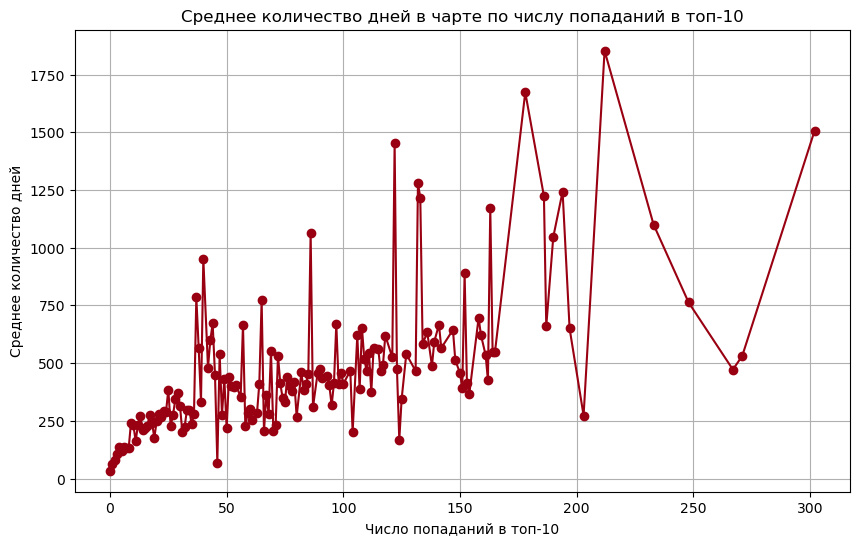

In [26]:
# 1. Гипотеза: Среднее количество дней в чарте для песен,
# которые попадали в топ-10 несколько раз, выше, чем для песен, которые попадали в топ-10 только один раз.

import matplotlib.pyplot as plt

# Сгруппируем данные по количеству попаданий в топ-10 и рассчитаем среднее количество дней
grouped_days = top_10000.groupby('top_10_(xtimes)')['days'].mean().reset_index()

# Построим линейный график
plt.figure(figsize=(10, 6))
plt.plot(grouped_days['top_10_(xtimes)'], grouped_days['days'], marker='o', color='#990011')

# Настроим график
plt.title('Среднее количество дней в чарте по числу попаданий в топ-10')
plt.xlabel('Число попаданий в топ-10')
plt.ylabel('Среднее количество дней')
plt.grid(True)

# Покажем график
plt.show()


**Вывод**:  
   Чем чаще песня попадает в топ-10, тем дольше она остается в чарте.

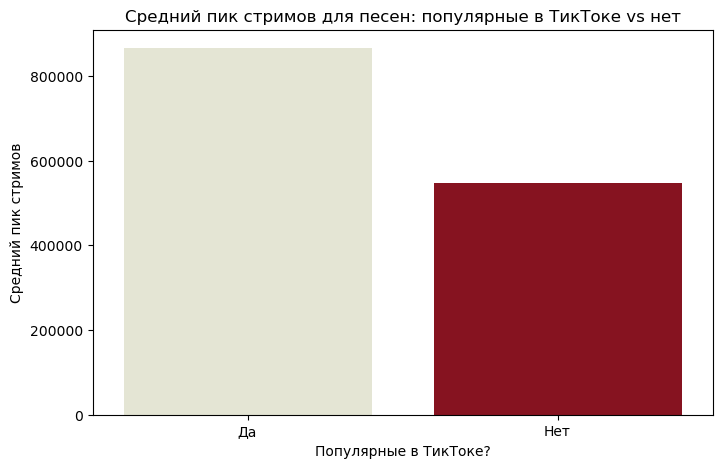

In [25]:
# 2. Гипотеза: Песни, которые завирусились в TikTok, имеют больший пик стримов.

# Группируем по наличию популярности в TikTok и считаем средний пик стримов
viral_tiktok_peak_streams = top_10000.groupby('viral_on_tiktok')['peak_streams'].mean().reset_index()


import seaborn as sns
import matplotlib.pyplot as plt

# Определим список цветов
colors = ['#E7E8D1', '#990011']

# Столбчатая диаграмма для сравнения среднего пика стримов для вирусных и не вирусных песен
plt.figure(figsize=(8, 5))

# Используем свои цвета
sns.barplot(x='viral_on_tiktok', y='peak_streams', data=viral_tiktok_peak_streams, palette=colors)

# Настроим график
plt.title('Средний пик стримов для песен: популярные в ТикТоке vs нет')
plt.xlabel('Популярные в ТикТоке?')
plt.ylabel('Средний пик стримов')
plt.xticks([0, 1], ['Да', 'Нет'], rotation=0)

# Покажем график
plt.show()


**Вывод:**
Песни, которые стали популярными в TikTok, показывают значительно более высокий средний пик стримов, чем те, которые не стали вирусными на платформе. Это подтверждается тем, что средний пик стримов для вирусных песен в TikTok составляет около 865,000, в то время как для остальных он значительно ниже — около 547,000.

In [21]:
display(viral_songs)

,Position,artists,track_name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams,viral_on_tiktok
5,6,travis scott,goosebumps,1995,4.0,8,0,977275,672972704,Да
12,13,travis scott,sicko mode,1046,190.0,1,(x19),4129691,586638599,Да
16,17,glass animals,heat waves,763,248.0,1,(x34),1230046,540754791,Да
18,19,roddy ricch,the box,650,197.0,1,(x85),3781452,504210201,Да
23,24,olivia rodrigo,good 4 u,547,187.0,1,(x53),4974833,454100610,Да
...,...,...,...,...,...,...,...,...,...,...
9747,9748,kesha,cannibal,1,0.0,121,0,246975,246975,Да
10216,10217,doja cat,rules,1,0.0,182,0,218402,218402,Да
10275,10276,britney spears,...baby one more time,2,0.0,165,0,129901,212135,Да
10912,10913,sean paul,temperature,1,0.0,179,0,85446,85446,Да


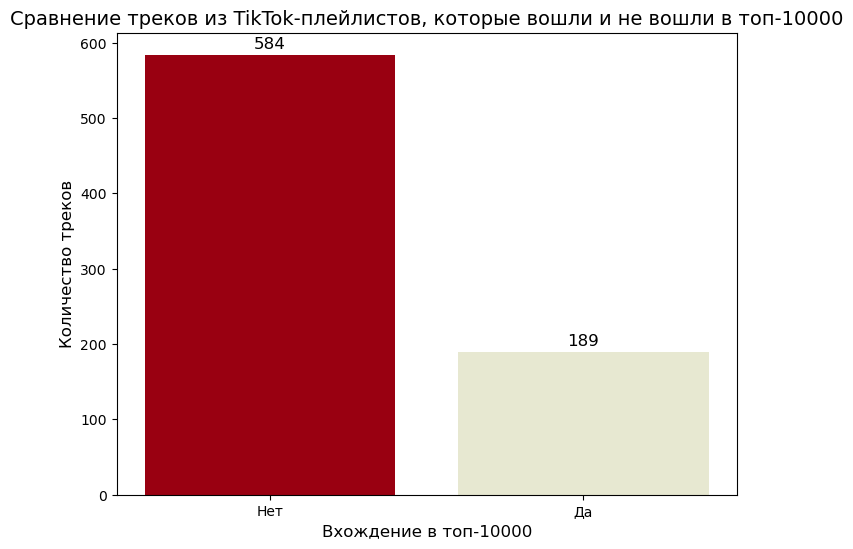

In [22]:
import matplotlib.pyplot as plt

# Добавляем колонку для проверки вхождения трека в топ-10000
tiktok_df['in_top_10000'] = tiktok_df.apply(
    lambda row: 'Да' if ((row['track_name'], row['artists']) in zip(top_10000['track_name'], top_10000['artists'])) else 'Нет',
    axis=1
)

# Подсчитываем количество треков, которые вошли и не вошли в топ-10000
track_counts = tiktok_df['in_top_10000'].value_counts()

# Строим график
plt.figure(figsize=(8, 6))
bars = plt.bar(track_counts.index, track_counts.values, color=['#990011', '#E7E8D1'])

# Добавляем подписи к столбикам
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom', fontsize=12)

# Заголовок и подписи осей
plt.title('Сравнение треков из TikTok-плейлистов, которые вошли и не вошли в топ-10000', fontsize=14)
plt.xlabel('Вхождение в топ-10000', fontsize=12)
plt.ylabel('Количество треков', fontsize=12)

plt.show()


## Выводы

Этот график показывает, сколько треков из TikTok-плейлистов попали в топ-10000. Видно, что значительная часть вирусных TikTok-хитов не закрепляется в долгосрочных чартах. Однако некоторым удается пробиться в список самых популярных песен, что доказывает влияние TikTok на музыкальную индустрию. Более того, график "Средний пик стримов для песен: популярные в ТикТоке vS нет" показал, что виральные на платформе треки в среднем значительно превосходят по стримам обычные, что ещё раз подтверждает важность TikTok в этом вопросе.

#### **Задача 3.1:** Выявить самого влиятельного ТикТок-артиста нашего времени

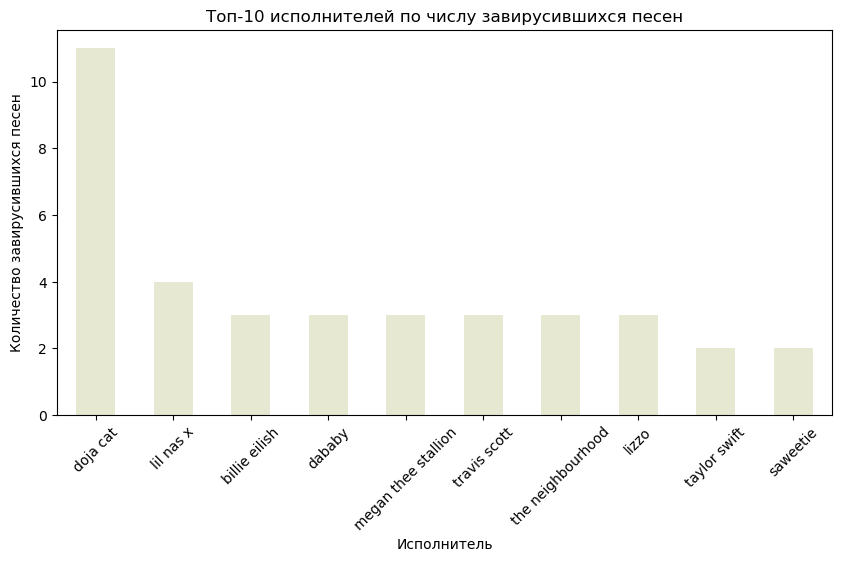

In [24]:
artist_counts = viral_songs['artists'].value_counts()

import matplotlib.pyplot as plt

# Берем топ-10 артистов
top_artists = artist_counts.head(10)

# Строим график
plt.figure(figsize=(10, 5))
top_artists.plot(kind='bar', color='#E7E8D1')
plt.xlabel("Исполнитель")
plt.ylabel("Количество завирусившихся песен")
plt.title("Топ-10 исполнителей по числу завирусившихся песен")
plt.xticks(rotation=45)
plt.show()

## Выводы

Самым влиятельным ТикТок-артистом последних 6 лет стала Doja Cat. Треки певицы не только завирусились на площадке, но и стали частью культуры нашего времени, что подтверждает эффективность ТикТока для продвижения музыки. 

# **Финальный вывод**

Исследование показало, что **TikTok** сильно влияет на музыкальную индустрию, помогая песням и артистам становиться популярными. Более трети треков из плейлиста **Global 50** стали вирусными в TikTok, что подчеркивает роль платформы как инструмента для продвижения музыки.

Хотя большинство вирусных песен не остаются в чартах надолго, некоторые из них, такие как **Doja Cat**, становятся частью музыкальной культуры и сохраняют свою популярность. Некоторые треки также достигают **топ-10000 нашего времени (с 1960-х)**, что подтверждает влияние TikTok на долгосрочные музыкальные тренды и карьеру артистов.


In [1]:
import os
import matplotlib.pyplot as plt

# Создаем папку для сохранения, если ее нет
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# Сохранение всех графиков
for i, fig in enumerate(plt.get_fignums()):
    fig = plt.figure(i)  # Получаем объект графика
    fig.savefig(f'graphs/graph_{i}.png', dpi=300, bbox_inches='tight')
